<a href="https://colab.research.google.com/github/fredionix/OpenPriceStockPredictionLSTM/blob/master/LSTM_Simple_Stock_Open_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import semua library yang dibutuhkan
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from keras.layers import Activation, Dense, Dropout

Using TensorFlow backend.


In [0]:
from google.colab import files
!pip install -U -q PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import io
import pandas as pd

     |████████████████████████████████| 993kB 6.3MB/s 


In [0]:
#memulai proses
#Extract 
link = 'https://drive.google.com/open?id=1l99Zkw_FIf2l78YYOIT3wjm0q42F2kYb'
#link = 'https://drive.google.com/open?id=1_hubawU4TdqwBJ551nl_r4j84bWmB5s1'
#link = 'https://drive.google.com/open?id=1B315cMlXYL9ekgM6vepklfj3IQTsLiZQ'
fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('TSLA.csv')  
dataset = pd.read_csv('TSLA.csv')



print("checking if any null values are present\n", dataset.isna().sum())


dataset = dataset.drop(dataset.index[0]) #drop first index row, start with row 1, for easy split
#print(dataset)#print un droped dataset

#print("data set index 0 ", dataset.index[0])
dataset = dataset.drop(['Date'], axis=1) #drop date collumn
#print(dataset)#print un droped dataset


#print(dataset)#print un droped dataset
target = dataset.iloc[:,0]#select all rows and first collumn as target, open collumn as target for y test 33 and ytrain 66 
target =target.values#get values of open collumn

#print(target)
data = dataset.iloc[:,1:] #select all rows, from index 1 column to last collumn index, eliminate open col as target
data=data.values #getthe values of each row put it in the list
data = data.astype('float32')#declare float32 as type

scaler = MinMaxScaler(feature_range=(0, 1)) #create to scaling from 0-1 object range
data = scaler.fit_transform(data)#transform the values to 0-1 only

#load
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,train_size=0.8, random_state=42) #split to 33% test size, data go to x, test go to y, random state for initial shufling in the split process

#print bentuk xtrain ytrain xtest ytest

print("Please show me the shape of X_train:",X_train.shape)
print("Please show me the shape of X_test:",X_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

W0614 06:02:43.693628 139730168149888 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNo

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Please show me the shape of X_train: (99, 5)
Please show me the shape of X_test: (25, 5)
Please show me the shape of y_train: (99,)
Please show me the shape of y_test: (25,)


In [0]:
#reshape with format: row, 1, cols with train is 66% of row, in this case 25
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
#reshape with format: row, 1, cols with train is 66% of row, in this case 83
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print("Please show me the shape of X_test:",X_test.shape)
print("Please show me the shape of X_train:",X_train.shape)

Please show me the shape of X_test: (25, 1, 5)
Please show me the shape of X_train: (99, 1, 5)


In [0]:
model = Sequential()
model.add(LSTM(125, input_shape=(1,5))) #input shape same the structure we reshaping


model.add(Dense(1)) #ini output layer
#ini continuous data bukan discrete, jadi algo lossnya men_squared error
model.compile(loss='mean_squared_error', optimizer='sgd')
#data is trained here


In [0]:
model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=1) #set verbose to 1 to keep up log, use 1000 epoch for 100 iteration training model
#prediction using X_test
Predict = model.predict(X_test) #predict x test for open data col
testScore = math.sqrt(mean_squared_error(y_test, Predict))#calculate test score



Epoch 1/1000
99/99 [==============================] - 1s 9ms/step - loss: 79252.0800
Epoch 2/1000
99/99 [==============================] - 0s 757us/step - loss: 79170.4725
Epoch 3/1000
99/99 [==============================] - 0s 741us/step - loss: 79077.5091
Epoch 4/1000
99/99 [==============================] - 0s 785us/step - loss: 78963.4220
Epoch 5/1000
99/99 [==============================] - 0s 758us/step - loss: 78831.1412
Epoch 6/1000
99/99 [==============================] - 0s 717us/step - loss: 78659.9112
Epoch 7/1000
99/99 [==============================] - 0s 724us/step - loss: 78455.9297
Epoch 8/1000
99/99 [==============================] - 0s 699us/step - loss: 78211.9369
Epoch 9/1000
99/99 [==============================] - 0s 738us/step - loss: 77915.3782
Epoch 10/1000
99/99 [==============================] - 0s 743us/step - loss: 77566.0429
Epoch 11/1000
99/99 [==============================] - 0s 752us/step - loss: 77177.4961
Epoch 12/1000
99/99 [======================

Test Score: 6.70 RMSE


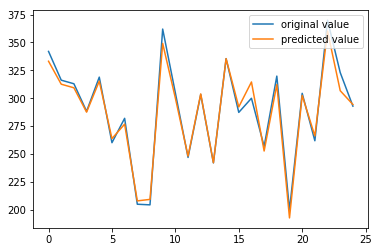

In [0]:
from matplotlib import pyplot
print('Test Score: %.2f RMSE' % (testScore))


plt.plot(y_test)#original value that we split
plt.plot(Predict)#prediction from xtest with the model keras
plt.legend(['original value','predicted value'],loc='upper right')
plt.show()

In [0]:
model.save('model.h5')
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()

In [0]:
import tensorflow as tf
from tensorflow import keras
# Recreate the exact same model, including weights and optimizer.
new_model =keras.models.load_model('model.h5')
new_model.summary()

Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 125)               65500     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 126       
Total params: 65,626
Trainable params: 65,626
Non-trainable params: 0
_________________________________________________________________


Test Score: 5.27 RMSE


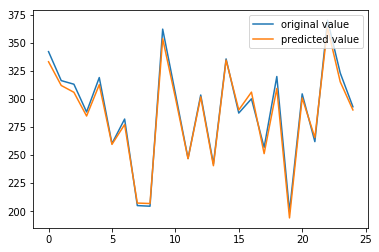

In [0]:
result = new_model.predict(X_test) #predict x test for open data col
testScore = math.sqrt(mean_squared_error(y_test, result))#calculate test score

print('Test Score: %.2f RMSE' % (testScore))
plt.plot(y_test)#original value that we split
plt.plot(Predict)#prediction from xtest with the model keras
plt.legend(['original value','predicted value'],loc='upper right')
plt.show()